### **1. SVM on original dataset with various feature representation techniques :**

In [ ]:
# Import required libraries
import os
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score, classification_report, plot_roc_curve, homogeneity_completeness_v_measure, silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#defining dataset paths
B_path = '/content/App Dataset/Dataset/B/sys'
M_path = '/content/App Dataset/Dataset/M/sys'

**Model Based on Occurence of Calls :**

In [ ]:
#function to calculate model metrics and plot results and ROC curve
def model(kernel, train_x, train_y, test_x, test_y):
  clf = svm.SVC(kernel = kernel)
  clf.fit(train_x, train_y)
  pred = clf.predict(test_x)
  metrics = classification_report(test_y, pred, target_names = ['B','M'])[:168]
  acc = accuracy_score(test_y, pred)
  plot_roc_curve(clf, test_x, test_y)
  plt.title("kernel : {}".format(kernel))
  plt.show()
  print('\033[1m'+'\n{} \n Accuracy : {} \n'.format(metrics,acc)+'\033[0m')  
  return acc

In [ ]:
#fucntion to read data from the file provided
def corp(path, label):
  os.chdir(path)
  corpus = []
  for file in os.listdir(): 
      file1 = open(file,"r")
      calls = file1.read()
      calls = calls.replace('\n',' ')[:-1]
      call_list = (calls, label)
      corpus.append(call_list)
  return corpus

In [ ]:
#getting dataset from B directory
df_B = pd.DataFrame(corp(B_path,0), columns = ['Calls', 'Class'])
df_B.index = os.listdir(B_path)
df_B.head()

,Calls,Class
com.foodiestrip.apk.sys_names.txt,ioctl ioctl clock_gettime clock_gettime clock_...,0
com.bitdrome.rmc2.apk.sys_names.txt,writev ioctl getuid epoll_pwait epoll_ctl recv...,0
com.appbuilder.legitimateonlinejobs.apk.sys_names.txt,getuid writev write mprotect faccessat newfsta...,0
com.germany.usedcars.apk.sys_names.txt,read getuid epoll_pwait recvfrom write sendto ...,0
com.BATUTAAPPS.funnyfaketvprankk.apk.sys_names.txt,getuid epoll_pwait read recvfrom sendto recvfr...,0


In [ ]:
#getting dataset from M directory
df_M = pd.DataFrame(corp(M_path,1), columns = ['Calls', 'Class'])
df_M.index = os.listdir(M_path)
df_M.head()

,Calls,Class
d3b5934d22b1e58f62b56d15653964f5161f421eaa68da08034c19983b8fdd6c.apk.sys_names.txt,munmap close openat fstat close openat fstat c...,1
32fe9ef7ee7f2214d686a88e9be101a74cc9b1ab47f52d7bb50ea8f0d4592a73.apk.sys_names.txt,recvfrom recvfrom recvfrom recvfrom recvfrom r...,1
4d873af4820deacba019f177b37f13495910568bf3547b8acdc10c06daf094b5.apk.sys_names.txt,pread pread mmap munmap pread pread mmap munma...,1
62579a46b244d2f91550736dbb6a7f2b1896106424f8c4fb7dd0eb99536382a5.apk.sys_names.txt,read getuid epoll_pwait ioctl getuid epoll_pwa...,1
66e9f7ac68fb07aec08d9fcefbeec04e0d10702d335ac6a9415ec2fabdb1fb15.apk.sys_names.txt,ioctl ioctl faccessat mprotect mprotect mprote...,1


In [ ]:
df = df_B.append([df_M])                #joining the above dataframes

In [ ]:
#Using CountVectorizer method from sklearn library 
vectorizer = CountVectorizer()          
X = vectorizer.fit_transform(df.Calls)

In [ ]:
#Preparing a dataframe by applying the vectorizer method to the dataset
df1 = pd.DataFrame(pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names()))
df1.index = df.index
df1.head()

,_llseek,bind,capget,clock_gettime,clone,close,connect,dup,epoll_create1,epoll_ctl,epoll_pwait,eventfd2,faccessat,fchmod,fchmodat,fcntl,fcntl64,fdatasync,flock,fstat,fstat64,fstatat64,fsync,ftruncate,ftruncate64,futex,getcwd,getdents64,getegid,getegid32,geteuid,geteuid32,getpid,getppid,getpriority,getrlimit,getsockname,getsockopt,gettid,gettimeofday,...,openat,pipe2,ppoll,prctl,pread,pread64,pwrite,pwrite64,read,readlinkat,recvfrom,renameat,rt_sigaction,rt_sigprocmask,rt_sigreturn,sched_getparam,sched_getscheduler,sched_yield,sendmsg,sendto,setpriority,setrlimit,setsockopt,shutdown,sigaction,sigreturn,socket,socketpair,stat64,statfs,statfs64,tgkill,tkill,ugetrlimit,uname,unlinkat,utimensat,wait4,write,writev
com.foodiestrip.apk.sys_names.txt,0,0,0,26254,8,108,0,48,0,110,4975,0,1,0,1,0,53,0,0,0,0,15,0,0,0,158,0,0,0,0,0,0,0,13,1,0,0,0,0,2,...,8,0,0,2,0,28,0,0,2228,0,4985,0,0,9,1,0,0,0,0,2746,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2581,585
com.bitdrome.rmc2.apk.sys_names.txt,0,0,0,0,9,312,0,123,0,338,3173,0,0,0,0,129,0,0,0,0,0,0,0,0,0,178,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11,0,0,1,130,0,0,0,1063,0,3727,0,0,684,3,0,0,0,0,2913,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2346,157
com.appbuilder.legitimateonlinejobs.apk.sys_names.txt,0,0,0,0,36,116,0,50,1,50,8478,0,5,0,2,58,0,0,0,68,0,0,0,0,0,327,0,2,0,0,0,0,0,1,0,3,0,0,0,0,...,79,1,0,2,87,0,0,0,521,1,2875,0,0,6,1,0,0,23,2,1751,3,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,636,686
com.germany.usedcars.apk.sys_names.txt,0,0,0,0,14,157,0,77,0,94,7624,0,13,0,1,69,0,0,0,62,0,0,0,0,0,760,0,0,0,0,0,0,0,0,5,0,0,0,0,0,...,81,0,1,0,377,0,0,0,1955,0,5621,1,0,4,0,0,0,0,10,3140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5712,564
com.BATUTAAPPS.funnyfaketvprankk.apk.sys_names.txt,0,0,0,0,26,102,0,32,0,46,5910,0,6,0,0,56,0,0,0,68,0,0,0,0,0,836,0,0,0,0,0,0,0,0,0,2,0,0,0,0,...,57,0,1,0,63,0,0,0,467,0,2931,0,0,2,0,0,0,0,3,2435,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,834,599


In [ ]:
#Preparing the final dataset
df_new = df.drop(columns=['Calls'])
df_new = pd.concat([df_new,df1], axis = 1)
df_new.head()

,Class,_llseek,bind,capget,clock_gettime,clone,close,connect,dup,epoll_create1,epoll_ctl,epoll_pwait,eventfd2,faccessat,fchmod,fchmodat,fcntl,fcntl64,fdatasync,flock,fstat,fstat64,fstatat64,fsync,ftruncate,ftruncate64,futex,getcwd,getdents64,getegid,getegid32,geteuid,geteuid32,getpid,getppid,getpriority,getrlimit,getsockname,getsockopt,gettid,...,openat,pipe2,ppoll,prctl,pread,pread64,pwrite,pwrite64,read,readlinkat,recvfrom,renameat,rt_sigaction,rt_sigprocmask,rt_sigreturn,sched_getparam,sched_getscheduler,sched_yield,sendmsg,sendto,setpriority,setrlimit,setsockopt,shutdown,sigaction,sigreturn,socket,socketpair,stat64,statfs,statfs64,tgkill,tkill,ugetrlimit,uname,unlinkat,utimensat,wait4,write,writev
com.foodiestrip.apk.sys_names.txt,0,0,0,0,26254,8,108,0,48,0,110,4975,0,1,0,1,0,53,0,0,0,0,15,0,0,0,158,0,0,0,0,0,0,0,13,1,0,0,0,0,...,8,0,0,2,0,28,0,0,2228,0,4985,0,0,9,1,0,0,0,0,2746,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2581,585
com.bitdrome.rmc2.apk.sys_names.txt,0,0,0,0,0,9,312,0,123,0,338,3173,0,0,0,0,129,0,0,0,0,0,0,0,0,0,178,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11,0,0,1,130,0,0,0,1063,0,3727,0,0,684,3,0,0,0,0,2913,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2346,157
com.appbuilder.legitimateonlinejobs.apk.sys_names.txt,0,0,0,0,0,36,116,0,50,1,50,8478,0,5,0,2,58,0,0,0,68,0,0,0,0,0,327,0,2,0,0,0,0,0,1,0,3,0,0,0,...,79,1,0,2,87,0,0,0,521,1,2875,0,0,6,1,0,0,23,2,1751,3,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,636,686
com.germany.usedcars.apk.sys_names.txt,0,0,0,0,0,14,157,0,77,0,94,7624,0,13,0,1,69,0,0,0,62,0,0,0,0,0,760,0,0,0,0,0,0,0,0,5,0,0,0,0,...,81,0,1,0,377,0,0,0,1955,0,5621,1,0,4,0,0,0,0,10,3140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5712,564
com.BATUTAAPPS.funnyfaketvprankk.apk.sys_names.txt,0,0,0,0,0,26,102,0,32,0,46,5910,0,6,0,0,56,0,0,0,68,0,0,0,0,0,836,0,0,0,0,0,0,0,0,0,2,0,0,0,...,57,0,1,0,63,0,0,0,467,0,2931,0,0,2,0,0,0,0,3,2435,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,834,599


**SVM Models :**

In [ ]:
#Splitting the dataset into train and test data
features = list(df_new.columns)
features.remove('Class')
x = df_new[features]
x = normalize(x)
y = df_new['Class']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.1, random_state = 0)

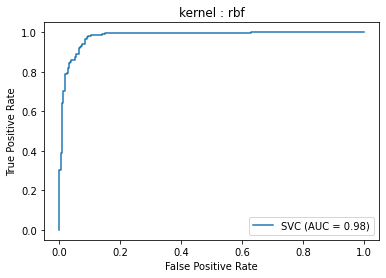


              precision    recall  f1-score   support

           B       0.93      0.92      0.92       251
           M       0.94      0.95      0.94       332

     
 Accuracy : 0.9331046312178388 



In [ ]:
#Calling the model function for model metrics and plotting
acc1_occ = model('rbf', train_x, train_y, test_x, test_y)

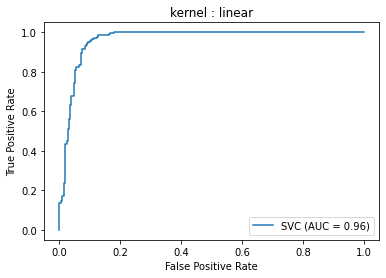


              precision    recall  f1-score   support

           B       0.91      0.92      0.91       251
           M       0.94      0.93      0.93       332

     
 Accuracy : 0.9228130360205832 



In [ ]:
acc2_occ = model('linear', train_x, train_y, test_x, test_y)

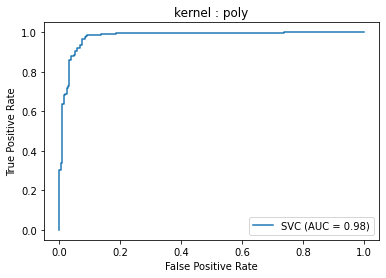


              precision    recall  f1-score   support

           B       0.95      0.92      0.94       251
           M       0.94      0.97      0.95       332

     
 Accuracy : 0.9468267581475128 



In [ ]:
acc3_occ = model('poly', train_x, train_y, test_x, test_y)

**Model based on Boolean occurence of calls :**

In [ ]:
#Preparing Boolean Occurence dataset from the above dataset by setting values as 1 where count > 1 
for i in df_new.columns:
  df_new[i] = (df_new[i] >= 1).astype(int)
df_new.head()

,Class,_llseek,bind,capget,clock_gettime,clone,close,connect,dup,epoll_create1,epoll_ctl,epoll_pwait,eventfd2,faccessat,fchmod,fchmodat,fcntl,fcntl64,fdatasync,flock,fstat,fstat64,fstatat64,fsync,ftruncate,ftruncate64,futex,getcwd,getdents64,getegid,getegid32,geteuid,geteuid32,getpid,getppid,getpriority,getrlimit,getsockname,getsockopt,gettid,...,openat,pipe2,ppoll,prctl,pread,pread64,pwrite,pwrite64,read,readlinkat,recvfrom,renameat,rt_sigaction,rt_sigprocmask,rt_sigreturn,sched_getparam,sched_getscheduler,sched_yield,sendmsg,sendto,setpriority,setrlimit,setsockopt,shutdown,sigaction,sigreturn,socket,socketpair,stat64,statfs,statfs64,tgkill,tkill,ugetrlimit,uname,unlinkat,utimensat,wait4,write,writev
com.foodiestrip.apk.sys_names.txt,0,0,0,0,1,1,1,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
com.bitdrome.rmc2.apk.sys_names.txt,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
com.appbuilder.legitimateonlinejobs.apk.sys_names.txt,0,0,0,0,0,1,1,0,1,1,1,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,...,1,1,0,1,1,0,0,0,1,1,1,0,0,1,1,0,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
com.germany.usedcars.apk.sys_names.txt,0,0,0,0,0,1,1,0,1,0,1,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
com.BATUTAAPPS.funnyfaketvprankk.apk.sys_names.txt,0,0,0,0,0,1,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


**SVM Models :**

In [ ]:
features = list(df_new.columns)
features.remove('Class')
x = df_new[features]
y = df_new['Class']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.1, random_state = 0)

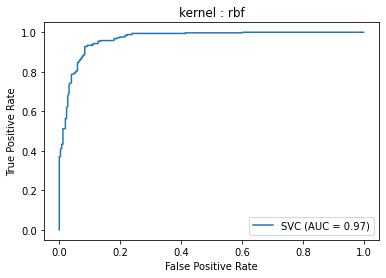


              precision    recall  f1-score   support

           B       0.91      0.90      0.90       251
           M       0.92      0.93      0.93       332

     
 Accuracy : 0.9176672384219554 



In [ ]:
acc1_bool = model('rbf', train_x, train_y, test_x, test_y)

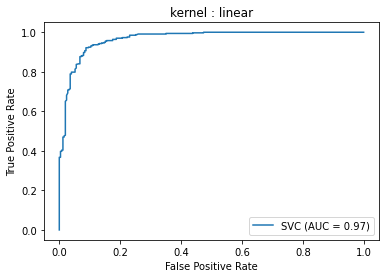


              precision    recall  f1-score   support

           B       0.90      0.90      0.90       251
           M       0.92      0.93      0.92       332

     
 Accuracy : 0.9142367066895368 



In [ ]:
acc2_bool = model('linear', train_x, train_y, test_x, test_y)

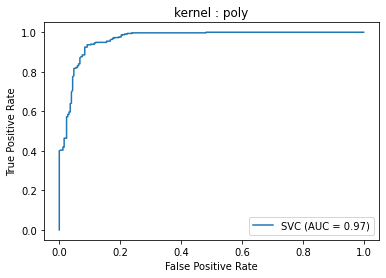


              precision    recall  f1-score   support

           B       0.91      0.91      0.91       251
           M       0.93      0.93      0.93       332

     
 Accuracy : 0.9228130360205832 



In [ ]:
acc3_bool = model('poly', train_x, train_y, test_x, test_y)

**Model Based on TF-IDF values :**

In [ ]:
#Calling TfidfVectorizer method from sklearn library to calculate tf-idf values
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df.Calls)

In [ ]:
#Performing the same steps as CountVectorizer below
df1 = pd.DataFrame(pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names()))
df1.index = df.index
df1.head()

,_llseek,bind,capget,clock_gettime,clone,close,connect,dup,epoll_create1,epoll_ctl,epoll_pwait,eventfd2,faccessat,fchmod,fchmodat,fcntl,fcntl64,fdatasync,flock,fstat,fstat64,fstatat64,fsync,ftruncate,ftruncate64,futex,getcwd,getdents64,getegid,getegid32,geteuid,geteuid32,getpid,getppid,getpriority,getrlimit,getsockname,getsockopt,gettid,gettimeofday,...,openat,pipe2,ppoll,prctl,pread,pread64,pwrite,pwrite64,read,readlinkat,recvfrom,renameat,rt_sigaction,rt_sigprocmask,rt_sigreturn,sched_getparam,sched_getscheduler,sched_yield,sendmsg,sendto,setpriority,setrlimit,setsockopt,shutdown,sigaction,sigreturn,socket,socketpair,stat64,statfs,statfs64,tgkill,tkill,ugetrlimit,uname,unlinkat,utimensat,wait4,write,writev
com.foodiestrip.apk.sys_names.txt,0.0,0.0,0.0,0.986754,0.000108,0.001216,0.0,0.000570,0.000000,0.001312,0.055856,0.0,0.000014,0.0,0.000020,0.000000,0.002348,0.0,0.0,0.000000,0.0,0.000673,0.0,0.0,0.0,0.001795,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000464,0.000031,0.000000,0.0,0.0,0.0,0.00009,...,0.000092,0.00000,0.000000,0.000028,0.000000,0.001238,0.0,0.0,0.025019,0.000000,0.058736,0.000000,0.0,0.000103,0.000019,0.0,0.0,0.000000,0.000000,0.032696,0.000052,0.000000,0.0,0.0,0.0,0.0,0.0,0.000025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.030327,0.006720
com.bitdrome.rmc2.apk.sys_names.txt,0.0,0.0,0.0,0.000000,0.001487,0.042813,0.0,0.017802,0.000000,0.049155,0.434282,0.0,0.000000,0.0,0.000000,0.020036,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.024657,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,...,0.001535,0.00000,0.000000,0.000169,0.019063,0.000000,0.0,0.0,0.145516,0.000000,0.535340,0.000000,0.0,0.095699,0.000702,0.0,0.0,0.000000,0.000000,0.422832,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.336049,0.021985
com.appbuilder.legitimateonlinejobs.apk.sys_names.txt,0.0,0.0,0.0,0.000000,0.003735,0.009997,0.0,0.004545,0.000307,0.004567,0.728787,0.0,0.000545,0.0,0.000308,0.005658,0.000000,0.0,0.0,0.007499,0.0,0.000000,0.0,0.0,0.0,0.028450,0.0,0.000411,0.0,0.0,0.0,0.0,0.0,0.000273,0.000000,0.000667,0.0,0.0,0.0,0.00000,...,0.006925,0.00029,0.000000,0.000212,0.008012,0.000000,0.0,0.0,0.044794,0.000192,0.259366,0.000000,0.0,0.000527,0.000147,0.0,0.0,0.003551,0.000508,0.159632,0.000596,0.000304,0.0,0.0,0.0,0.0,0.0,0.000387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.057219,0.060333
com.germany.usedcars.apk.sys_names.txt,0.0,0.0,0.0,0.000000,0.001132,0.010543,0.0,0.005454,0.000000,0.006690,0.510670,0.0,0.001103,0.0,0.000120,0.005245,0.000000,0.0,0.0,0.005328,0.0,0.000000,0.0,0.0,0.0,0.051522,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000929,0.000000,0.0,0.0,0.0,0.00000,...,0.005533,0.00000,0.000247,0.000000,0.027054,0.000000,0.0,0.0,0.130972,0.000000,0.395129,0.000184,0.0,0.000274,0.000000,0.0,0.0,0.000000,0.001978,0.223055,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000178,0.0,0.0,0.400423,0.038651
com.BATUTAAPPS.funnyfaketvprankk.apk.sys_names.txt,0.0,0.0,0.0,0.000000,0.003304,0.010766,0.0,0.003563,0.000000,0.005146,0.622211,0.0,0.000800,0.0,0.000000,0.006690,0.000000,0.0,0.0,0.009184,0.0,0.000000,0.0,0.0,0.0,0.089079,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000544,0.0,0.0,0.0,0.00000,...,0.006120,0.00000,0.000388,0.000000,0.007106,0.000000,0.0,0.0,0.049175,0.000000,0.323843,0.000000,0.0,0.000215,0.000000,0.0,0.0,0.000000,0.000933,0.271879,0.000000,0.000372,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.091895,0.064521


In [ ]:
df_new = df.drop(columns=['Calls'])
df_new = pd.concat([df_new,df1], axis = 1)
df_new.head()

,Class,_llseek,bind,capget,clock_gettime,clone,close,connect,dup,epoll_create1,epoll_ctl,epoll_pwait,eventfd2,faccessat,fchmod,fchmodat,fcntl,fcntl64,fdatasync,flock,fstat,fstat64,fstatat64,fsync,ftruncate,ftruncate64,futex,getcwd,getdents64,getegid,getegid32,geteuid,geteuid32,getpid,getppid,getpriority,getrlimit,getsockname,getsockopt,gettid,...,openat,pipe2,ppoll,prctl,pread,pread64,pwrite,pwrite64,read,readlinkat,recvfrom,renameat,rt_sigaction,rt_sigprocmask,rt_sigreturn,sched_getparam,sched_getscheduler,sched_yield,sendmsg,sendto,setpriority,setrlimit,setsockopt,shutdown,sigaction,sigreturn,socket,socketpair,stat64,statfs,statfs64,tgkill,tkill,ugetrlimit,uname,unlinkat,utimensat,wait4,write,writev
com.foodiestrip.apk.sys_names.txt,0,0.0,0.0,0.0,0.986754,0.000108,0.001216,0.0,0.000570,0.000000,0.001312,0.055856,0.0,0.000014,0.0,0.000020,0.000000,0.002348,0.0,0.0,0.000000,0.0,0.000673,0.0,0.0,0.0,0.001795,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000464,0.000031,0.000000,0.0,0.0,0.0,...,0.000092,0.00000,0.000000,0.000028,0.000000,0.001238,0.0,0.0,0.025019,0.000000,0.058736,0.000000,0.0,0.000103,0.000019,0.0,0.0,0.000000,0.000000,0.032696,0.000052,0.000000,0.0,0.0,0.0,0.0,0.0,0.000025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.030327,0.006720
com.bitdrome.rmc2.apk.sys_names.txt,0,0.0,0.0,0.0,0.000000,0.001487,0.042813,0.0,0.017802,0.000000,0.049155,0.434282,0.0,0.000000,0.0,0.000000,0.020036,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.024657,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.001535,0.00000,0.000000,0.000169,0.019063,0.000000,0.0,0.0,0.145516,0.000000,0.535340,0.000000,0.0,0.095699,0.000702,0.0,0.0,0.000000,0.000000,0.422832,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.336049,0.021985
com.appbuilder.legitimateonlinejobs.apk.sys_names.txt,0,0.0,0.0,0.0,0.000000,0.003735,0.009997,0.0,0.004545,0.000307,0.004567,0.728787,0.0,0.000545,0.0,0.000308,0.005658,0.000000,0.0,0.0,0.007499,0.0,0.000000,0.0,0.0,0.0,0.028450,0.0,0.000411,0.0,0.0,0.0,0.0,0.0,0.000273,0.000000,0.000667,0.0,0.0,0.0,...,0.006925,0.00029,0.000000,0.000212,0.008012,0.000000,0.0,0.0,0.044794,0.000192,0.259366,0.000000,0.0,0.000527,0.000147,0.0,0.0,0.003551,0.000508,0.159632,0.000596,0.000304,0.0,0.0,0.0,0.0,0.0,0.000387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.057219,0.060333
com.germany.usedcars.apk.sys_names.txt,0,0.0,0.0,0.0,0.000000,0.001132,0.010543,0.0,0.005454,0.000000,0.006690,0.510670,0.0,0.001103,0.0,0.000120,0.005245,0.000000,0.0,0.0,0.005328,0.0,0.000000,0.0,0.0,0.0,0.051522,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000929,0.000000,0.0,0.0,0.0,...,0.005533,0.00000,0.000247,0.000000,0.027054,0.000000,0.0,0.0,0.130972,0.000000,0.395129,0.000184,0.0,0.000274,0.000000,0.0,0.0,0.000000,0.001978,0.223055,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000178,0.0,0.0,0.400423,0.038651
com.BATUTAAPPS.funnyfaketvprankk.apk.sys_names.txt,0,0.0,0.0,0.0,0.000000,0.003304,0.010766,0.0,0.003563,0.000000,0.005146,0.622211,0.0,0.000800,0.0,0.000000,0.006690,0.000000,0.0,0.0,0.009184,0.0,0.000000,0.0,0.0,0.0,0.089079,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000544,0.0,0.0,0.0,...,0.006120,0.00000,0.000388,0.000000,0.007106,0.000000,0.0,0.0,0.049175,0.000000,0.323843,0.000000,0.0,0.000215,0.000000,0.0,0.0,0.000000,0.000933,0.271879,0.000000,0.000372,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.091895,0.064521


**SVM Models :**

In [ ]:
features = list(df_new.columns)
features.remove('Class')
x = df_new[features]
y = df_new['Class']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.1, random_state = 0)

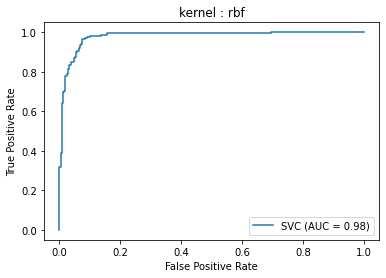


              precision    recall  f1-score   support

           B       0.94      0.92      0.93       251
           M       0.94      0.95      0.95       332

     
 Accuracy : 0.9399656946826758 



In [ ]:
acc1_tfidf = model('rbf', train_x, train_y, test_x, test_y)

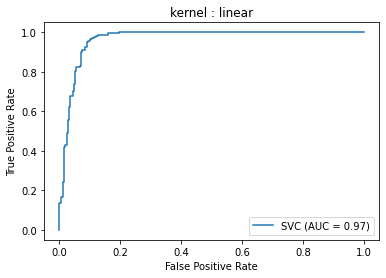


              precision    recall  f1-score   support

           B       0.90      0.92      0.91       251
           M       0.94      0.92      0.93       332

     
 Accuracy : 0.9210977701543739 



In [ ]:
acc2_tfidf = model('linear', train_x, train_y, test_x, test_y)

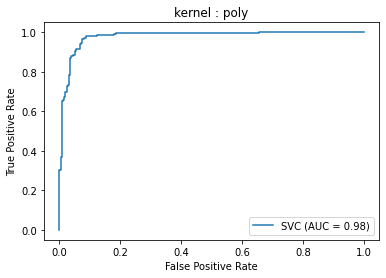


              precision    recall  f1-score   support

           B       0.95      0.92      0.94       251
           M       0.94      0.96      0.95       332

     
 Accuracy : 0.9451114922813036 



In [ ]:
acc3_tfidf = model('poly', train_x, train_y, test_x, test_y)

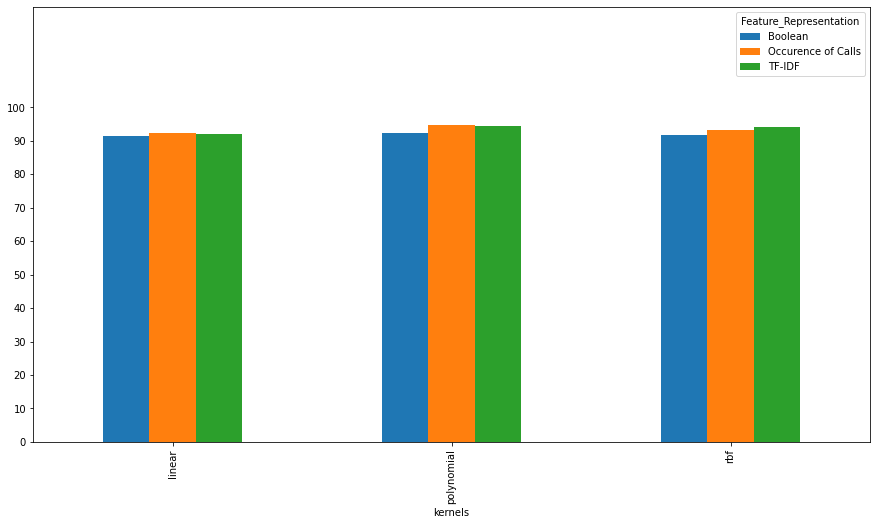

In [ ]:
#Plotting all the results for comparison
kernels = ['rbf','linear','polynomial']
feat_rep = ['Occurence of Calls','Boolean','TF-IDF']
acc = [acc1_occ, acc2_occ, acc3_occ, acc1_bool, acc2_bool, acc3_bool, acc1_tfidf, acc2_tfidf, acc3_tfidf]
acc = [100*i for i in acc]
x = []
count = 0
for i in range(3):
  for j in range(3):
    x.append([kernels[(j+3)%3], feat_rep[i], acc[count]])
    count += 1
f = pd.DataFrame(x,columns=['kernels', 'Feature_Representation', 'Accuracy'])
f.pivot('kernels','Feature_Representation','Accuracy').plot(kind='bar', figsize =(15,8), yticks=range(0,110,10), ylim=(0,130))
plt.show()

***We find that on average TF-IDF perform the best among all the feature representation methods on the original dataset while the polynomial kernel has the best performance among kernels.***

### **2. Sequence of calls**

**Sequence of 2 calls :**

**Model based on Occurence of Calls :**

In [ ]:
#Calling the CountVectorizer again with bigram parameters for 2 consecutive calls
vectorizer = CountVectorizer(ngram_range=(2,2))
X = vectorizer.fit_transform(df.Calls)

In [ ]:
#Same process as in Q1. for all the represenations
df1 = pd.DataFrame(pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names()))
df1.index = df.index
df1.head()

,_llseek _llseek,_llseek clock_gettime,_llseek close,_llseek faccessat,_llseek fcntl64,_llseek fstat64,_llseek fstatat64,_llseek ftruncate64,_llseek futex,_llseek madvise,_llseek mmap2,_llseek mprotect,_llseek openat,_llseek read,_llseek write,bind fcntl,bind getsockname,bind ppoll,bind setsockopt,bind socket,capget futex,clock_gettime _llseek,clock_gettime clock_gettime,clock_gettime clone,clock_gettime close,clock_gettime dup,clock_gettime epoll_ctl,clock_gettime epoll_pwait,clock_gettime faccessat,clock_gettime fchmodat,clock_gettime fcntl64,clock_gettime fstat,clock_gettime fstat64,clock_gettime fstatat64,clock_gettime futex,clock_gettime getcwd,clock_gettime getdents64,clock_gettime getppid,clock_gettime getpriority,clock_gettime getrlimit,...,writev getpriority,writev getrlimit,writev getsockname,writev getsockopt,writev gettid,writev gettimeofday,writev getuid,writev getuid32,writev ioctl,writev lseek,writev madvise,writev mkdirat,writev mmap,writev mmap2,writev mprotect,writev munmap,writev newfstatat,writev openat,writev pipe2,writev prctl,writev pread,writev pread64,writev read,writev readlinkat,writev recvfrom,writev renameat,writev rt_sigprocmask,writev rt_sigreturn,writev sched_yield,writev sendmsg,writev sendto,writev setsockopt,writev shutdown,writev socket,writev socketpair,writev statfs,writev statfs64,writev unlinkat,writev write,writev writev
com.foodiestrip.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13990,0,2,4,47,2260,1,0,3,0,0,2,69,0,0,0,1,0,...,0,0,0,0,0,0,0,5,18,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,8,0,0,0,0,0,79,0,0,0,0,0,0,0,7,1
com.bitdrome.rmc2.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,18,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,0,0,0,0,0,0,0,32,82
com.appbuilder.legitimateonlinejobs.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,73,0,47,0,1,0,5,0,5,0,8,0,0,0,3,0,0,0,16,0,0,0,0,0,135,0,0,0,0,0,0,0,30,352
com.germany.usedcars.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,39,0,65,0,1,0,3,0,5,0,1,0,0,0,0,0,0,0,20,0,0,0,0,0,115,0,0,0,0,0,0,0,22,280
com.BATUTAAPPS.funnyfaketvprankk.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,31,0,77,0,1,0,7,0,2,0,7,0,0,0,8,0,2,0,13,0,0,0,0,0,90,0,0,0,0,0,0,0,45,304


In [ ]:
df_new = df.drop(columns=['Calls'])
df_new = pd.concat([df_new,df1], axis = 1)
df_new.head()

,Class,_llseek _llseek,_llseek clock_gettime,_llseek close,_llseek faccessat,_llseek fcntl64,_llseek fstat64,_llseek fstatat64,_llseek ftruncate64,_llseek futex,_llseek madvise,_llseek mmap2,_llseek mprotect,_llseek openat,_llseek read,_llseek write,bind fcntl,bind getsockname,bind ppoll,bind setsockopt,bind socket,capget futex,clock_gettime _llseek,clock_gettime clock_gettime,clock_gettime clone,clock_gettime close,clock_gettime dup,clock_gettime epoll_ctl,clock_gettime epoll_pwait,clock_gettime faccessat,clock_gettime fchmodat,clock_gettime fcntl64,clock_gettime fstat,clock_gettime fstat64,clock_gettime fstatat64,clock_gettime futex,clock_gettime getcwd,clock_gettime getdents64,clock_gettime getppid,clock_gettime getpriority,...,writev getpriority,writev getrlimit,writev getsockname,writev getsockopt,writev gettid,writev gettimeofday,writev getuid,writev getuid32,writev ioctl,writev lseek,writev madvise,writev mkdirat,writev mmap,writev mmap2,writev mprotect,writev munmap,writev newfstatat,writev openat,writev pipe2,writev prctl,writev pread,writev pread64,writev read,writev readlinkat,writev recvfrom,writev renameat,writev rt_sigprocmask,writev rt_sigreturn,writev sched_yield,writev sendmsg,writev sendto,writev setsockopt,writev shutdown,writev socket,writev socketpair,writev statfs,writev statfs64,writev unlinkat,writev write,writev writev
com.foodiestrip.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13990,0,2,4,47,2260,1,0,3,0,0,2,69,0,0,0,1,...,0,0,0,0,0,0,0,5,18,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,8,0,0,0,0,0,79,0,0,0,0,0,0,0,7,1
com.bitdrome.rmc2.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,18,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,0,0,0,0,0,0,0,32,82
com.appbuilder.legitimateonlinejobs.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,73,0,47,0,1,0,5,0,5,0,8,0,0,0,3,0,0,0,16,0,0,0,0,0,135,0,0,0,0,0,0,0,30,352
com.germany.usedcars.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,39,0,65,0,1,0,3,0,5,0,1,0,0,0,0,0,0,0,20,0,0,0,0,0,115,0,0,0,0,0,0,0,22,280
com.BATUTAAPPS.funnyfaketvprankk.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,31,0,77,0,1,0,7,0,2,0,7,0,0,0,8,0,2,0,13,0,0,0,0,0,90,0,0,0,0,0,0,0,45,304


In [ ]:
features = list(df_new.columns)
features.remove('Class')
x = df_new[features]
x_norm = normalize(x)
y = df_new['Class']
train_x, test_x, train_y, test_y = train_test_split(x_norm, y, test_size = 0.1, random_state = 0)

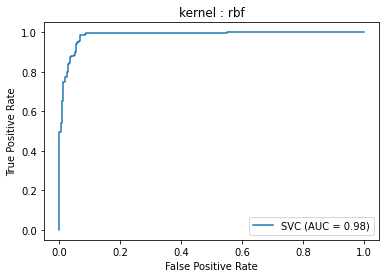


              precision    recall  f1-score   support

           B       0.95      0.93      0.94       251
           M       0.95      0.96      0.96       332

     
 Accuracy : 0.9502572898799314 



In [ ]:
acc1_occ = model('rbf', train_x, train_y, test_x, test_y)

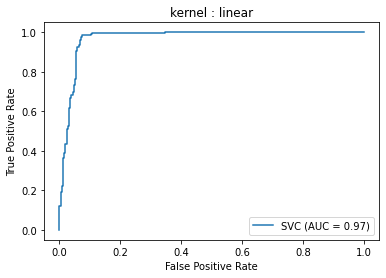


              precision    recall  f1-score   support

           B       0.93      0.93      0.93       251
           M       0.95      0.95      0.95       332

     
 Accuracy : 0.9399656946826758 



In [ ]:
acc2_occ = model('linear', train_x, train_y, test_x, test_y)

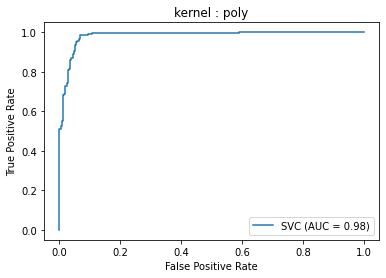


              precision    recall  f1-score   support

           B       0.96      0.93      0.95       251
           M       0.95      0.97      0.96       332

     
 Accuracy : 0.9536878216123499 



In [ ]:
acc3_occ = model('poly', train_x, train_y, test_x, test_y)

**Model Based on Boolean occurence of calls :**

In [ ]:
for i in df_new.columns:
  df_new[i] = (df_new[i] >= 1).astype(int)
df_new.head()

,Class,_llseek _llseek,_llseek clock_gettime,_llseek close,_llseek faccessat,_llseek fcntl64,_llseek fstat64,_llseek fstatat64,_llseek ftruncate64,_llseek futex,_llseek madvise,_llseek mmap2,_llseek mprotect,_llseek openat,_llseek read,_llseek write,bind fcntl,bind getsockname,bind ppoll,bind setsockopt,bind socket,capget futex,clock_gettime _llseek,clock_gettime clock_gettime,clock_gettime clone,clock_gettime close,clock_gettime dup,clock_gettime epoll_ctl,clock_gettime epoll_pwait,clock_gettime faccessat,clock_gettime fchmodat,clock_gettime fcntl64,clock_gettime fstat,clock_gettime fstat64,clock_gettime fstatat64,clock_gettime futex,clock_gettime getcwd,clock_gettime getdents64,clock_gettime getppid,clock_gettime getpriority,...,writev getpriority,writev getrlimit,writev getsockname,writev getsockopt,writev gettid,writev gettimeofday,writev getuid,writev getuid32,writev ioctl,writev lseek,writev madvise,writev mkdirat,writev mmap,writev mmap2,writev mprotect,writev munmap,writev newfstatat,writev openat,writev pipe2,writev prctl,writev pread,writev pread64,writev read,writev readlinkat,writev recvfrom,writev renameat,writev rt_sigprocmask,writev rt_sigreturn,writev sched_yield,writev sendmsg,writev sendto,writev setsockopt,writev shutdown,writev socket,writev socketpair,writev statfs,writev statfs64,writev unlinkat,writev write,writev writev
com.foodiestrip.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,0,1,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
com.bitdrome.rmc2.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
com.appbuilder.legitimateonlinejobs.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
com.germany.usedcars.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
com.BATUTAAPPS.funnyfaketvprankk.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1


In [ ]:
features = list(df_new.columns)
features.remove('Class')
x = df_new[features]
y = df_new['Class']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.1, random_state = 0)

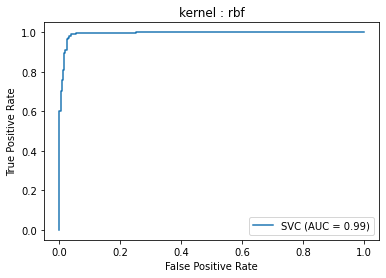


              precision    recall  f1-score   support

           B       0.99      0.94      0.97       251
           M       0.96      0.99      0.97       332

     
 Accuracy : 0.9708404802744426 



In [ ]:
acc1_bool = model('rbf', train_x, train_y, test_x, test_y)

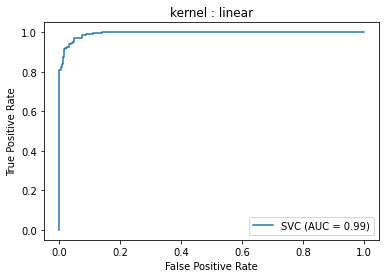


              precision    recall  f1-score   support

           B       0.95      0.95      0.95       251
           M       0.96      0.96      0.96       332

     
 Accuracy : 0.9588336192109777 



In [ ]:
acc2_bool = model('linear', train_x, train_y, test_x, test_y)

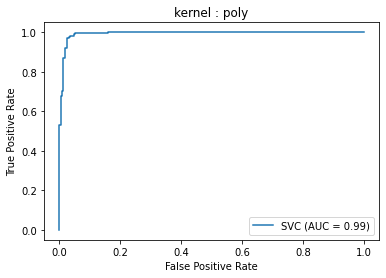


              precision    recall  f1-score   support

           B       0.99      0.91      0.95       251
           M       0.94      0.99      0.96       332

     
 Accuracy : 0.9588336192109777 



In [ ]:
acc3_bool = model('poly', train_x, train_y, test_x, test_y)

**Model based on TF-IDF values :**

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(2,2))
X = vectorizer.fit_transform(df.Calls)

In [ ]:
df1 = pd.DataFrame(pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names()))
df1.index = df.index
df1.head()

,_llseek _llseek,_llseek clock_gettime,_llseek close,_llseek faccessat,_llseek fcntl64,_llseek fstat64,_llseek fstatat64,_llseek ftruncate64,_llseek futex,_llseek madvise,_llseek mmap2,_llseek mprotect,_llseek openat,_llseek read,_llseek write,bind fcntl,bind getsockname,bind ppoll,bind setsockopt,bind socket,capget futex,clock_gettime _llseek,clock_gettime clock_gettime,clock_gettime clone,clock_gettime close,clock_gettime dup,clock_gettime epoll_ctl,clock_gettime epoll_pwait,clock_gettime faccessat,clock_gettime fchmodat,clock_gettime fcntl64,clock_gettime fstat,clock_gettime fstat64,clock_gettime fstatat64,clock_gettime futex,clock_gettime getcwd,clock_gettime getdents64,clock_gettime getppid,clock_gettime getpriority,clock_gettime getrlimit,...,writev getpriority,writev getrlimit,writev getsockname,writev getsockopt,writev gettid,writev gettimeofday,writev getuid,writev getuid32,writev ioctl,writev lseek,writev madvise,writev mkdirat,writev mmap,writev mmap2,writev mprotect,writev munmap,writev newfstatat,writev openat,writev pipe2,writev prctl,writev pread,writev pread64,writev read,writev readlinkat,writev recvfrom,writev renameat,writev rt_sigprocmask,writev rt_sigreturn,writev sched_yield,writev sendmsg,writev sendto,writev setsockopt,writev shutdown,writev socket,writev socketpair,writev statfs,writev statfs64,writev unlinkat,writev write,writev writev
com.foodiestrip.apk.sys_names.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8713,0.0,0.000147,0.000284,0.003169,0.145193,0.000072,0.0,0.000216,0.0,0.0,0.000135,0.004451,0.0,0.0,0.0,0.000097,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000342,0.000318,0.0,0.000000,0.0,0.000000,0.0,0.000024,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000075,0.000000,0.0,0.000155,0.0,0.0,0.0,0.0,0.0,0.001405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000128,0.000018
com.bitdrome.rmc2.apk.sys_names.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000293,0.000000,0.004747,0.0,0.000000,0.0,0.000000,0.0,0.000358,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.006116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008723,0.022088
com.appbuilder.legitimateonlinejobs.apk.sys_names.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.009387,0.000000,0.005446,0.0,0.000201,0.0,0.001234,0.0,0.000786,0.0,0.001937,0.0,0.0,0.0,0.000464,0.000000,0.000000,0.0,0.002035,0.0,0.0,0.0,0.0,0.0,0.015773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003593,0.041661
com.germany.usedcars.apk.sys_names.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.004854,0.000000,0.007290,0.0,0.000195,0.0,0.000717,0.0,0.000761,0.0,0.000234,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.002463,0.0,0.0,0.0,0.0,0.0,0.013005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002550,0.032076
com.BATUTAAPPS.funnyfaketvprankk.apk.sys_names.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.005024,0.000000,0.011244,0.0,0.000254,0.0,0.002178,0.0,0.000396,0.0,0.002136,0.0,0.0,0.0,0.001560,0.000000,0.000783,0.0,0.002084,0.0,0.0,0.0,0.0,0.0,0.013252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006793,0.045344


In [ ]:
df_new = df.drop(columns=['Calls'])
df_new = pd.concat([df_new,df1], axis = 1)
df_new.head()

,Class,_llseek _llseek,_llseek clock_gettime,_llseek close,_llseek faccessat,_llseek fcntl64,_llseek fstat64,_llseek fstatat64,_llseek ftruncate64,_llseek futex,_llseek madvise,_llseek mmap2,_llseek mprotect,_llseek openat,_llseek read,_llseek write,bind fcntl,bind getsockname,bind ppoll,bind setsockopt,bind socket,capget futex,clock_gettime _llseek,clock_gettime clock_gettime,clock_gettime clone,clock_gettime close,clock_gettime dup,clock_gettime epoll_ctl,clock_gettime epoll_pwait,clock_gettime faccessat,clock_gettime fchmodat,clock_gettime fcntl64,clock_gettime fstat,clock_gettime fstat64,clock_gettime fstatat64,clock_gettime futex,clock_gettime getcwd,clock_gettime getdents64,clock_gettime getppid,clock_gettime getpriority,...,writev getpriority,writev getrlimit,writev getsockname,writev getsockopt,writev gettid,writev gettimeofday,writev getuid,writev getuid32,writev ioctl,writev lseek,writev madvise,writev mkdirat,writev mmap,writev mmap2,writev mprotect,writev munmap,writev newfstatat,writev openat,writev pipe2,writev prctl,writev pread,writev pread64,writev read,writev readlinkat,writev recvfrom,writev renameat,writev rt_sigprocmask,writev rt_sigreturn,writev sched_yield,writev sendmsg,writev sendto,writev setsockopt,writev shutdown,writev socket,writev socketpair,writev statfs,writev statfs64,writev unlinkat,writev write,writev writev
com.foodiestrip.apk.sys_names.txt,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8713,0.0,0.000147,0.000284,0.003169,0.145193,0.000072,0.0,0.000216,0.0,0.0,0.000135,0.004451,0.0,0.0,0.0,0.000097,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000342,0.000318,0.0,0.000000,0.0,0.000000,0.0,0.000024,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000075,0.000000,0.0,0.000155,0.0,0.0,0.0,0.0,0.0,0.001405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000128,0.000018
com.bitdrome.rmc2.apk.sys_names.txt,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000293,0.000000,0.004747,0.0,0.000000,0.0,0.000000,0.0,0.000358,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.006116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008723,0.022088
com.appbuilder.legitimateonlinejobs.apk.sys_names.txt,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.009387,0.000000,0.005446,0.0,0.000201,0.0,0.001234,0.0,0.000786,0.0,0.001937,0.0,0.0,0.0,0.000464,0.000000,0.000000,0.0,0.002035,0.0,0.0,0.0,0.0,0.0,0.015773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003593,0.041661
com.germany.usedcars.apk.sys_names.txt,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.004854,0.000000,0.007290,0.0,0.000195,0.0,0.000717,0.0,0.000761,0.0,0.000234,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.002463,0.0,0.0,0.0,0.0,0.0,0.013005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002550,0.032076
com.BATUTAAPPS.funnyfaketvprankk.apk.sys_names.txt,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.005024,0.000000,0.011244,0.0,0.000254,0.0,0.002178,0.0,0.000396,0.0,0.002136,0.0,0.0,0.0,0.001560,0.000000,0.000783,0.0,0.002084,0.0,0.0,0.0,0.0,0.0,0.013252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006793,0.045344


In [ ]:
features = list(df_new.columns)
features.remove('Class')
x = df_new[features]
y = df_new['Class']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.1, random_state = 0)

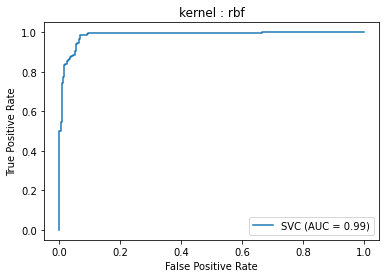


              precision    recall  f1-score   support

           B       0.95      0.93      0.94       251
           M       0.95      0.96      0.96       332

     
 Accuracy : 0.9502572898799314 



In [ ]:
acc1_tfidf = model('rbf', train_x, train_y, test_x, test_y)

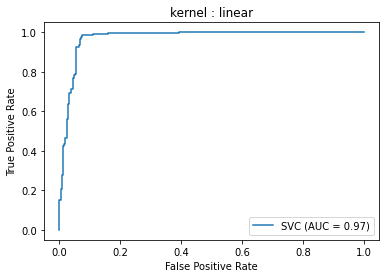


              precision    recall  f1-score   support

           B       0.92      0.93      0.93       251
           M       0.95      0.94      0.94       332

     
 Accuracy : 0.9365351629502573 



In [ ]:
acc2_tfidf = model('linear', train_x, train_y, test_x, test_y)

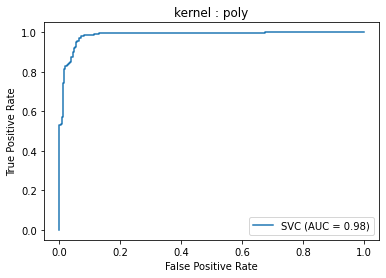


              precision    recall  f1-score   support

           B       0.96      0.93      0.95       251
           M       0.95      0.97      0.96       332

     
 Accuracy : 0.9536878216123499 



In [ ]:
acc3_tfidf = model('poly', train_x, train_y, test_x, test_y)

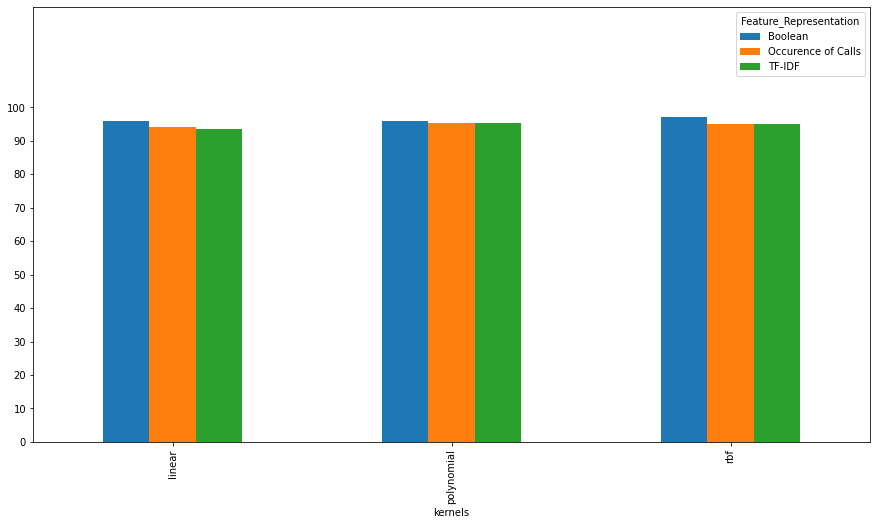

In [ ]:
kernels = ['rbf','linear','polynomial']
feat_rep = ['Occurence of Calls','Boolean','TF-IDF']
acc = [acc1_occ, acc2_occ, acc3_occ, acc1_bool, acc2_bool, acc3_bool, acc1_tfidf, acc2_tfidf, acc3_tfidf]
acc = [100*i for i in acc]
x = []
count = 0
for i in range(3):
  for j in range(3):
    x.append([kernels[(j+3)%3], feat_rep[i], acc[count]])
    count += 1
f = pd.DataFrame(x,columns=['kernels', 'Feature_Representation', 'Accuracy'])
f.pivot('kernels','Feature_Representation','Accuracy').plot(kind='bar', figsize =(15,8), yticks=range(0,110,10), ylim=(0,130))
plt.show()

**Sequence of 3 calls :**

**Model based on Occurence of Calls :**

In [ ]:
#Calling the CountVectorizer again with trigram parameters for 3 consecutive calls
vectorizer = CountVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(df.Calls)

In [ ]:
df1 = pd.DataFrame(pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names()))
df1.index = df.index
df1.head()

,_llseek _llseek _llseek,_llseek _llseek clock_gettime,_llseek _llseek close,_llseek _llseek fcntl64,_llseek _llseek futex,_llseek _llseek madvise,_llseek _llseek mmap2,_llseek _llseek read,_llseek _llseek write,_llseek clock_gettime _llseek,_llseek clock_gettime clock_gettime,_llseek clock_gettime writev,_llseek close fcntl64,_llseek close fstatat64,_llseek close mprotect,_llseek close openat,_llseek close renameat,_llseek close unlinkat,_llseek close write,_llseek faccessat openat,_llseek fcntl64 close,_llseek fcntl64 fcntl64,_llseek fcntl64 munmap,_llseek fcntl64 pread64,_llseek fstat64 fcntl64,_llseek fstat64 fstat64,_llseek fstatat64 fstatat64,_llseek ftruncate64 _llseek,_llseek futex _llseek,_llseek madvise fcntl64,_llseek madvise pread64,_llseek mmap2 clock_gettime,_llseek mmap2 fcntl64,_llseek mmap2 madvise,_llseek mmap2 munmap,_llseek mmap2 openat,_llseek mmap2 pread64,_llseek mprotect mprotect,_llseek openat read,_llseek read _llseek,...,writev writev fcntl,writev writev flock,writev writev fstat,writev writev futex,writev writev getdents64,writev writev getpriority,writev writev getrlimit,writev writev getsockname,writev writev gettid,writev writev gettimeofday,writev writev getuid,writev writev getuid32,writev writev ioctl,writev writev lseek,writev writev madvise,writev writev mkdirat,writev writev mmap,writev writev mmap2,writev writev mprotect,writev writev munmap,writev writev newfstatat,writev writev openat,writev writev pipe2,writev writev prctl,writev writev pread,writev writev pread64,writev writev read,writev writev recvfrom,writev writev renameat,writev writev rt_sigprocmask,writev writev rt_sigreturn,writev writev sched_yield,writev writev sendmsg,writev writev sendto,writev writev setsockopt,writev writev socket,writev writev socketpair,writev writev statfs,writev writev write,writev writev writev
com.foodiestrip.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
com.bitdrome.rmc2.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,1,68
com.appbuilder.legitimateonlinejobs.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0,10,0,6,0,0,0,2,0,4,0,2,0,0,0,0,0,0,9,0,0,0,0,0,52,0,0,0,0,7,256
com.germany.usedcars.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,8,0,3,0,1,0,0,0,2,0,0,0,0,0,0,0,0,15,0,0,0,0,0,49,0,0,0,0,11,190
com.BATUTAAPPS.funnyfaketvprankk.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,1,0,1,0,3,0,0,0,1,0,0,7,0,0,0,0,0,35,0,0,0,0,23,226


In [ ]:
df_new = df.drop(columns=['Calls'])
df_new = pd.concat([df_new,df1], axis = 1)
df_new.head()

,Class,_llseek _llseek _llseek,_llseek _llseek clock_gettime,_llseek _llseek close,_llseek _llseek fcntl64,_llseek _llseek futex,_llseek _llseek madvise,_llseek _llseek mmap2,_llseek _llseek read,_llseek _llseek write,_llseek clock_gettime _llseek,_llseek clock_gettime clock_gettime,_llseek clock_gettime writev,_llseek close fcntl64,_llseek close fstatat64,_llseek close mprotect,_llseek close openat,_llseek close renameat,_llseek close unlinkat,_llseek close write,_llseek faccessat openat,_llseek fcntl64 close,_llseek fcntl64 fcntl64,_llseek fcntl64 munmap,_llseek fcntl64 pread64,_llseek fstat64 fcntl64,_llseek fstat64 fstat64,_llseek fstatat64 fstatat64,_llseek ftruncate64 _llseek,_llseek futex _llseek,_llseek madvise fcntl64,_llseek madvise pread64,_llseek mmap2 clock_gettime,_llseek mmap2 fcntl64,_llseek mmap2 madvise,_llseek mmap2 munmap,_llseek mmap2 openat,_llseek mmap2 pread64,_llseek mprotect mprotect,_llseek openat read,...,writev writev fcntl,writev writev flock,writev writev fstat,writev writev futex,writev writev getdents64,writev writev getpriority,writev writev getrlimit,writev writev getsockname,writev writev gettid,writev writev gettimeofday,writev writev getuid,writev writev getuid32,writev writev ioctl,writev writev lseek,writev writev madvise,writev writev mkdirat,writev writev mmap,writev writev mmap2,writev writev mprotect,writev writev munmap,writev writev newfstatat,writev writev openat,writev writev pipe2,writev writev prctl,writev writev pread,writev writev pread64,writev writev read,writev writev recvfrom,writev writev renameat,writev writev rt_sigprocmask,writev writev rt_sigreturn,writev writev sched_yield,writev writev sendmsg,writev writev sendto,writev writev setsockopt,writev writev socket,writev writev socketpair,writev writev statfs,writev writev write,writev writev writev
com.foodiestrip.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
com.bitdrome.rmc2.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,1,68
com.appbuilder.legitimateonlinejobs.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0,10,0,6,0,0,0,2,0,4,0,2,0,0,0,0,0,0,9,0,0,0,0,0,52,0,0,0,0,7,256
com.germany.usedcars.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,8,0,3,0,1,0,0,0,2,0,0,0,0,0,0,0,0,15,0,0,0,0,0,49,0,0,0,0,11,190
com.BATUTAAPPS.funnyfaketvprankk.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,1,0,1,0,3,0,0,0,1,0,0,7,0,0,0,0,0,35,0,0,0,0,23,226


In [ ]:
features = list(df_new.columns)
features.remove('Class')
x = df_new[features]
x = normalize(x)
y = df_new['Class']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.1, random_state = 0)

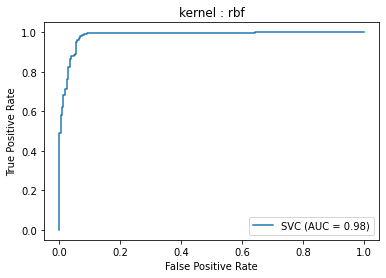


              precision    recall  f1-score   support

           B       0.96      0.94      0.95       251
           M       0.95      0.97      0.96       332

     
 Accuracy : 0.9536878216123499 



In [ ]:
acc1_occ = model('rbf', train_x, train_y, test_x, test_y)

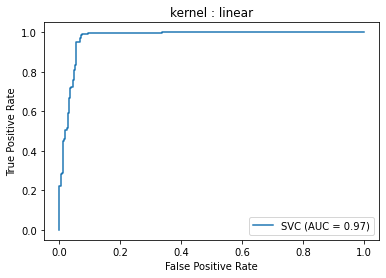


              precision    recall  f1-score   support

           B       0.93      0.93      0.93       251
           M       0.95      0.95      0.95       332

     
 Accuracy : 0.9416809605488851 



In [ ]:
acc2_occ = model('linear', train_x, train_y, test_x, test_y)

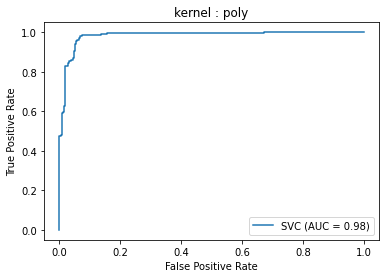


              precision    recall  f1-score   support

           B       0.96      0.94      0.95       251
           M       0.95      0.97      0.96       332

     
 Accuracy : 0.9536878216123499 



In [ ]:
acc3_occ = model('poly', train_x, train_y, test_x, test_y)

**Model Based on Boolean occurence of calls :**

In [ ]:
for i in df_new.columns:
  df_new[i] = (df_new[i] >= 1).astype(int)
df_new.head()

,Class,_llseek _llseek _llseek,_llseek _llseek clock_gettime,_llseek _llseek close,_llseek _llseek fcntl64,_llseek _llseek futex,_llseek _llseek madvise,_llseek _llseek mmap2,_llseek _llseek read,_llseek _llseek write,_llseek clock_gettime _llseek,_llseek clock_gettime clock_gettime,_llseek clock_gettime writev,_llseek close fcntl64,_llseek close fstatat64,_llseek close mprotect,_llseek close openat,_llseek close renameat,_llseek close unlinkat,_llseek close write,_llseek faccessat openat,_llseek fcntl64 close,_llseek fcntl64 fcntl64,_llseek fcntl64 munmap,_llseek fcntl64 pread64,_llseek fstat64 fcntl64,_llseek fstat64 fstat64,_llseek fstatat64 fstatat64,_llseek ftruncate64 _llseek,_llseek futex _llseek,_llseek madvise fcntl64,_llseek madvise pread64,_llseek mmap2 clock_gettime,_llseek mmap2 fcntl64,_llseek mmap2 madvise,_llseek mmap2 munmap,_llseek mmap2 openat,_llseek mmap2 pread64,_llseek mprotect mprotect,_llseek openat read,...,writev writev fcntl,writev writev flock,writev writev fstat,writev writev futex,writev writev getdents64,writev writev getpriority,writev writev getrlimit,writev writev getsockname,writev writev gettid,writev writev gettimeofday,writev writev getuid,writev writev getuid32,writev writev ioctl,writev writev lseek,writev writev madvise,writev writev mkdirat,writev writev mmap,writev writev mmap2,writev writev mprotect,writev writev munmap,writev writev newfstatat,writev writev openat,writev writev pipe2,writev writev prctl,writev writev pread,writev writev pread64,writev writev read,writev writev recvfrom,writev writev renameat,writev writev rt_sigprocmask,writev writev rt_sigreturn,writev writev sched_yield,writev writev sendmsg,writev writev sendto,writev writev setsockopt,writev writev socket,writev writev socketpair,writev writev statfs,writev writev write,writev writev writev
com.foodiestrip.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
com.bitdrome.rmc2.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
com.appbuilder.legitimateonlinejobs.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1
com.germany.usedcars.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1
com.BATUTAAPPS.funnyfaketvprankk.apk.sys_names.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1


In [ ]:
features = list(df_new.columns)
features.remove('Class')
x = df_new[features]
y = df_new['Class']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.1, random_state = 0)

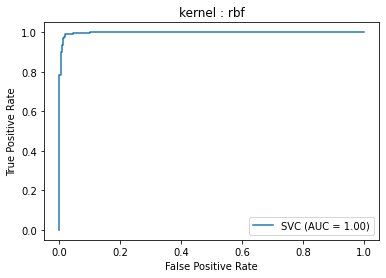


              precision    recall  f1-score   support

           B       0.99      0.94      0.97       251
           M       0.96      0.99      0.98       332

     
 Accuracy : 0.9725557461406518 



In [ ]:
acc1_bool = model('rbf', train_x, train_y, test_x, test_y)

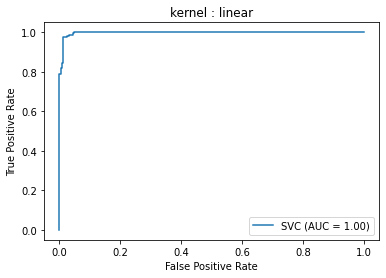


              precision    recall  f1-score   support

           B       0.98      0.96      0.97       251
           M       0.97      0.99      0.98       332

     
 Accuracy : 0.9759862778730704 



In [ ]:
acc2_bool = model('linear', train_x, train_y, test_x, test_y)

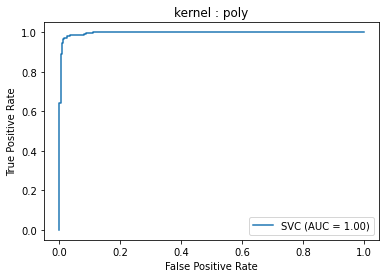


              precision    recall  f1-score   support

           B       1.00      0.89      0.94       251
           M       0.92      1.00      0.96       332

     
 Accuracy : 0.9519725557461407 



In [ ]:
acc3_bool = model('poly', train_x, train_y, test_x, test_y)

**Model based on TF-IDF values :**

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(df.Calls)

In [ ]:
df1 = pd.DataFrame(pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names()))
df1.index = df.index
df1.head()

,_llseek _llseek _llseek,_llseek _llseek clock_gettime,_llseek _llseek close,_llseek _llseek fcntl64,_llseek _llseek futex,_llseek _llseek madvise,_llseek _llseek mmap2,_llseek _llseek read,_llseek _llseek write,_llseek clock_gettime _llseek,_llseek clock_gettime clock_gettime,_llseek clock_gettime writev,_llseek close fcntl64,_llseek close fstatat64,_llseek close mprotect,_llseek close openat,_llseek close renameat,_llseek close unlinkat,_llseek close write,_llseek faccessat openat,_llseek fcntl64 close,_llseek fcntl64 fcntl64,_llseek fcntl64 munmap,_llseek fcntl64 pread64,_llseek fstat64 fcntl64,_llseek fstat64 fstat64,_llseek fstatat64 fstatat64,_llseek ftruncate64 _llseek,_llseek futex _llseek,_llseek madvise fcntl64,_llseek madvise pread64,_llseek mmap2 clock_gettime,_llseek mmap2 fcntl64,_llseek mmap2 madvise,_llseek mmap2 munmap,_llseek mmap2 openat,_llseek mmap2 pread64,_llseek mprotect mprotect,_llseek openat read,_llseek read _llseek,...,writev writev fcntl,writev writev flock,writev writev fstat,writev writev futex,writev writev getdents64,writev writev getpriority,writev writev getrlimit,writev writev getsockname,writev writev gettid,writev writev gettimeofday,writev writev getuid,writev writev getuid32,writev writev ioctl,writev writev lseek,writev writev madvise,writev writev mkdirat,writev writev mmap,writev writev mmap2,writev writev mprotect,writev writev munmap,writev writev newfstatat,writev writev openat,writev writev pipe2,writev writev prctl,writev writev pread,writev writev pread64,writev writev read,writev writev recvfrom,writev writev renameat,writev writev rt_sigprocmask,writev writev rt_sigreturn,writev writev sched_yield,writev writev sendmsg,writev writev sendto,writev writev setsockopt,writev writev socket,writev writev socketpair,writev writev statfs,writev writev write,writev writev writev
com.foodiestrip.apk.sys_names.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
com.bitdrome.rmc2.apk.sys_names.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.000682,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.004902,0.0,0.0,0.0,0.0,0.000825,0.027548
com.appbuilder.legitimateonlinejobs.apk.sys_names.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000572,0.0,0.0,0.0,0.0,0.0,0.0,0.002291,0.0,0.001081,0.0,0.00000,0.0,0.001052,0.0,0.000998,0.0,0.000878,0.0,0.0,0.0,0.000000,0.0,0.0,0.001871,0.0,0.0,0.0,0.0,0.0,0.007768,0.0,0.0,0.0,0.0,0.002113,0.037926
com.germany.usedcars.apk.sys_names.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.002107,0.0,0.000622,0.0,0.00047,0.0,0.000000,0.0,0.000574,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.003586,0.0,0.0,0.0,0.0,0.0,0.008416,0.0,0.0,0.0,0.0,0.003817,0.032364
com.BATUTAAPPS.funnyfaketvprankk.apk.sys_names.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.001837,0.0,0.000000,0.0,0.00000,0.0,0.000703,0.0,0.000333,0.0,0.001761,0.0,0.0,0.0,0.000569,0.0,0.0,0.001945,0.0,0.0,0.0,0.0,0.0,0.006988,0.0,0.0,0.0,0.0,0.009277,0.044748


In [ ]:
df_new = df.drop(columns=['Calls'])
df_new = pd.concat([df_new,df1], axis = 1)
df_new.head()

,Class,_llseek _llseek _llseek,_llseek _llseek clock_gettime,_llseek _llseek close,_llseek _llseek fcntl64,_llseek _llseek futex,_llseek _llseek madvise,_llseek _llseek mmap2,_llseek _llseek read,_llseek _llseek write,_llseek clock_gettime _llseek,_llseek clock_gettime clock_gettime,_llseek clock_gettime writev,_llseek close fcntl64,_llseek close fstatat64,_llseek close mprotect,_llseek close openat,_llseek close renameat,_llseek close unlinkat,_llseek close write,_llseek faccessat openat,_llseek fcntl64 close,_llseek fcntl64 fcntl64,_llseek fcntl64 munmap,_llseek fcntl64 pread64,_llseek fstat64 fcntl64,_llseek fstat64 fstat64,_llseek fstatat64 fstatat64,_llseek ftruncate64 _llseek,_llseek futex _llseek,_llseek madvise fcntl64,_llseek madvise pread64,_llseek mmap2 clock_gettime,_llseek mmap2 fcntl64,_llseek mmap2 madvise,_llseek mmap2 munmap,_llseek mmap2 openat,_llseek mmap2 pread64,_llseek mprotect mprotect,_llseek openat read,...,writev writev fcntl,writev writev flock,writev writev fstat,writev writev futex,writev writev getdents64,writev writev getpriority,writev writev getrlimit,writev writev getsockname,writev writev gettid,writev writev gettimeofday,writev writev getuid,writev writev getuid32,writev writev ioctl,writev writev lseek,writev writev madvise,writev writev mkdirat,writev writev mmap,writev writev mmap2,writev writev mprotect,writev writev munmap,writev writev newfstatat,writev writev openat,writev writev pipe2,writev writev prctl,writev writev pread,writev writev pread64,writev writev read,writev writev recvfrom,writev writev renameat,writev writev rt_sigprocmask,writev writev rt_sigreturn,writev writev sched_yield,writev writev sendmsg,writev writev sendto,writev writev setsockopt,writev writev socket,writev writev socketpair,writev writev statfs,writev writev write,writev writev writev
com.foodiestrip.apk.sys_names.txt,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
com.bitdrome.rmc2.apk.sys_names.txt,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.000682,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.004902,0.0,0.0,0.0,0.0,0.000825,0.027548
com.appbuilder.legitimateonlinejobs.apk.sys_names.txt,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000572,0.0,0.0,0.0,0.0,0.0,0.0,0.002291,0.0,0.001081,0.0,0.00000,0.0,0.001052,0.0,0.000998,0.0,0.000878,0.0,0.0,0.0,0.000000,0.0,0.0,0.001871,0.0,0.0,0.0,0.0,0.0,0.007768,0.0,0.0,0.0,0.0,0.002113,0.037926
com.germany.usedcars.apk.sys_names.txt,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.002107,0.0,0.000622,0.0,0.00047,0.0,0.000000,0.0,0.000574,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.003586,0.0,0.0,0.0,0.0,0.0,0.008416,0.0,0.0,0.0,0.0,0.003817,0.032364
com.BATUTAAPPS.funnyfaketvprankk.apk.sys_names.txt,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.001837,0.0,0.000000,0.0,0.00000,0.0,0.000703,0.0,0.000333,0.0,0.001761,0.0,0.0,0.0,0.000569,0.0,0.0,0.001945,0.0,0.0,0.0,0.0,0.0,0.006988,0.0,0.0,0.0,0.0,0.009277,0.044748


In [ ]:
features = list(df_new.columns)
features.remove('Class')
x = df_new[features]
y = df_new['Class']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.1, random_state = 0)

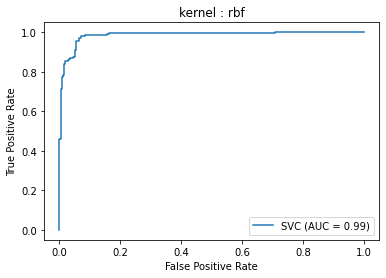


              precision    recall  f1-score   support

           B       0.96      0.93      0.95       251
           M       0.95      0.97      0.96       332

     
 Accuracy : 0.9554030874785592 



In [ ]:
acc1_tfidf = model('rbf', train_x, train_y, test_x, test_y)

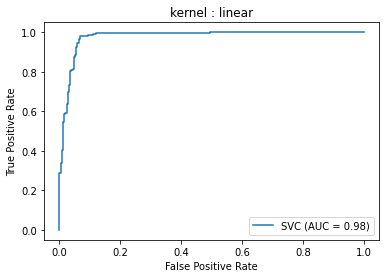


              precision    recall  f1-score   support

           B       0.93      0.94      0.93       251
           M       0.95      0.95      0.95       332

     
 Accuracy : 0.9433962264150944 



In [ ]:
acc2_tfidf = model('linear', train_x, train_y, test_x, test_y)

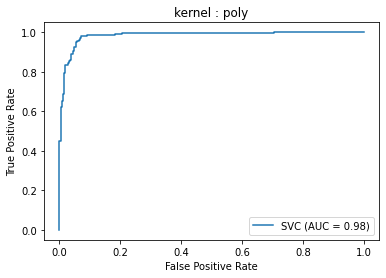


              precision    recall  f1-score   support

           B       0.95      0.93      0.94       251
           M       0.95      0.96      0.96       332

     
 Accuracy : 0.9502572898799314 



In [ ]:
acc3_tfidf = model('poly', train_x, train_y, test_x, test_y)

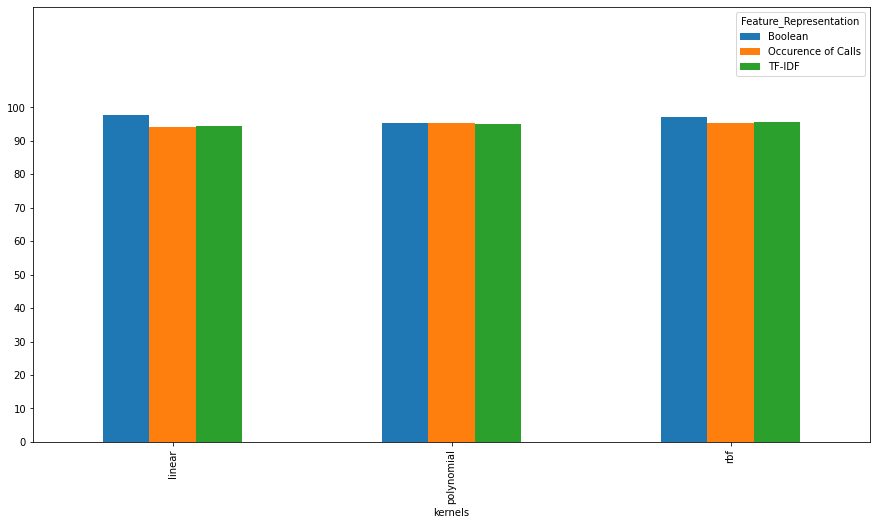

In [ ]:
kernels = ['rbf','linear','polynomial']
feat_rep = ['Occurence of Calls','Boolean','TF-IDF']
acc = [acc1_occ, acc2_occ, acc3_occ, acc1_bool, acc2_bool, acc3_bool, acc1_tfidf, acc2_tfidf, acc3_tfidf]
acc = [100*i for i in acc]
x = []
count = 0
for i in range(3):
  for j in range(3):
    x.append([kernels[(j+3)%3], feat_rep[i], acc[count]])
    count += 1
f = pd.DataFrame(x,columns=['kernels', 'Feature_Representation', 'Accuracy'])
f.pivot('kernels','Feature_Representation','Accuracy').plot(kind='bar', figsize =(15,8), yticks=range(0,110,10), ylim=(0,130))
plt.show()

**We find that 3 sequence of calls produce slightly better results than 2 sequence of call while boolean occurence of calls performs much better in all kernels across all feature represenataions. Polynomail kernels perform better on an average across all kernels.**

### **3. Feature Importance :**

**Occurence of calls :**

In [ ]:
#I have used bigram representations rather than trigram because of almost similar results
#Also the bigrams are light on the session while triagrams use a lot of resources

#Performing preprocessing on the original dataset based on occurence of calls
vectorizer = CountVectorizer(ngram_range=(2,2))
X = vectorizer.fit_transform(df.Calls)
df1 = pd.DataFrame(pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names()))
df1.index = df.index
df_new = df.drop(columns=['Calls'])
df_new = pd.concat([df_new,df1], axis = 1)
features = list(df_new.columns)
features.remove('Class')
x = df_new[features]
x = normalize(x)
y = df_new['Class']

In [ ]:
#Using Tree based Classifier for identifying important features
from sklearn.ensemble import ExtraTreesClassifier
mdl = ExtraTreesClassifier()
mdl.fit(x, y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
#Viewing the most important feaetures along with scores in the dataset
data ={'Feature':[],'Score':[]}
for i,v in zip(mdl.feature_importances_,df_new.columns[1:]):
  data['Score'].append(i)
  data['Feature'].append(v)
res = pd.DataFrame(data).sort_values('Score',ascending=False).head(50)
res

,Feature,Score
2346,write read,0.075796
1816,read write,0.050759
1206,madvise ioctl,0.038980
1785,read madvise,0.031332
1800,read read,0.026438
2320,write futex,0.025188
1783,read ioctl,0.017367
250,dup write,0.013781
2339,write munmap,0.012503
2348,write recvfrom,0.011827


[]

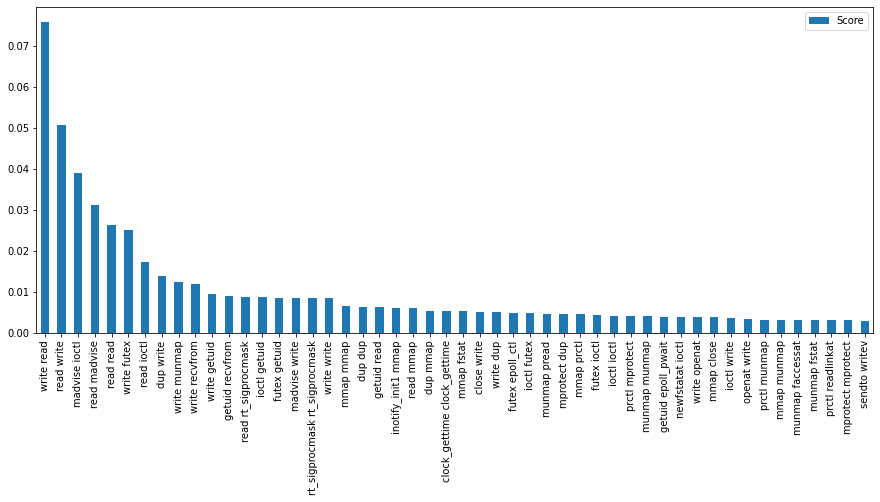

In [ ]:
#Plotting the important features against theie scores
(res.plot(kind='bar',figsize=(15,6)).set_xticklabels(res['Feature']))[0:0]

**TF-IDF :**

In [ ]:
#Performing preprocessing on the original dataset based on TF-IDF values
vectorizer = TfidfVectorizer(ngram_range=(2,2))
X = vectorizer.fit_transform(df.Calls)
df1 = pd.DataFrame(pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names()))
df1.index = df.index
df_new = df.drop(columns=['Calls'])
df_new = pd.concat([df_new,df1], axis = 1)
features = list(df_new.columns)
features.remove('Class')
x = df_new[features]
y = df_new['Class']

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
mdl = ExtraTreesClassifier()
mdl.fit(x, y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
data ={'Feature':[],'Score':[]}
for i,v in zip(mdl.feature_importances_,df_new.columns[1:]):
  data['Score'].append(i)
  data['Feature'].append(v)
res = pd.DataFrame(data).sort_values('Score',ascending=False).head(50)
res

,Feature,Score
2346,write read,0.049977
1800,read read,0.044360
1206,madvise ioctl,0.036912
1785,read madvise,0.034624
1816,read write,0.030494
1783,read ioctl,0.020318
2320,write futex,0.016334
2327,write getuid,0.014298
250,dup write,0.011969
2348,write recvfrom,0.010548


[]

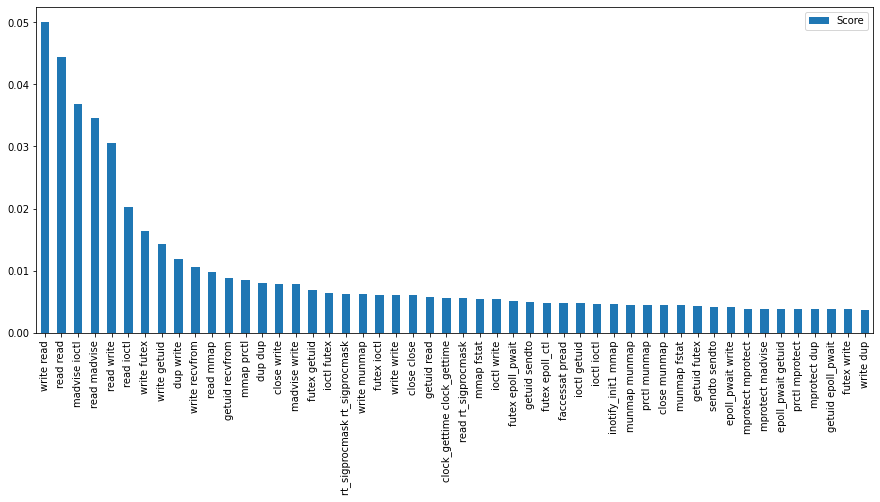

In [ ]:
(res.plot(kind='bar',figsize=(15,6)).set_xticklabels(res['Feature']))[0:0]

**Boolean Occurence of Calls :**

In [ ]:
#Performing preprocessing on the original dataset based on boolean occurence of calls
vectorizer = CountVectorizer(ngram_range=(2,2),binary=True)
X = vectorizer.fit_transform(df.Calls)
df1 = pd.DataFrame(pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names()))
df1.index = df.index
df_new = df.drop(columns=['Calls'])
df_new = pd.concat([df_new,df1], axis = 1)
features = list(df_new.columns)
features.remove('Class')
x = df_new[features]
y = df_new['Class']

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
mdl = ExtraTreesClassifier()
mdl.fit(x, y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
data ={'Feature':[],'Score':[]}
for i,v in zip(mdl.feature_importances_,df_new.columns[1:]):
  data['Score'].append(i)
  data['Feature'].append(v)
res = pd.DataFrame(data).sort_values('Score',ascending=False).head(50)
res

,Feature,Score
1785,read madvise,0.034644
2308,write dup,0.027850
1213,madvise mprotect,0.026230
709,futex epoll_ctl,0.025961
1360,mprotect dup,0.025550
250,dup write,0.024902
1388,mprotect madvise,0.022424
1805,read rt_sigprocmask,0.021744
175,close newfstatat,0.017183
1788,read mmap,0.016343


[]

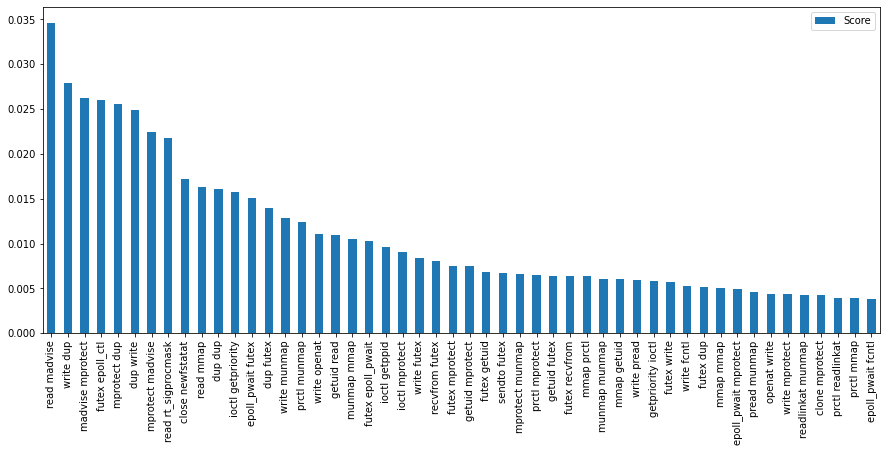

In [ ]:
(res.plot(kind='bar',figsize=(15,6)).set_xticklabels(res['Feature']))[0:0]